# Convergence study

For a given campaign load models for all available freqs and plot
convergence, duration ...


In [1]:
# Reload automatically all python modules before each cell exec
%load_ext autoreload
%autoreload 2

In [2]:
# standard python packages
import sys
import time
import os
import pickle
import numpy as np
from model_tools import load_model
# visu
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import scipy.io
import h5py
import simulation_campaigns
import collections
from post_process import compute_errors, plot_campaign, check_time_vectors, plot_errors, plot_y, plot_durations, save_dof, compute_errors_rel
import datetime

## Pick up results file(s)

Campaign parameters are supposed to be saved in a 'pkl' file

Load it and get sets of results (one set = a model run for different values of frequency)

#### List pkl files available:

In [4]:
ls campaign*.pkl

campaign0212.pkl         campaign_new_0612.pkl
campaign_1812.pkl        campaign_short_1312.pkl


#### Load a pkl and print configs and freqs

In [5]:
import pickle
import subprocess
pklfilename = 'campaign_1812.pkl'
figures_path = 'fig_' + os.path.splitext(pklfilename)[0]
if not os.path.exists(figures_path):
    os.mkdir(figures_path)
#pkl_file = open('campaign_new_0612.pkl', 'rb')
pkl_file = open(pklfilename, 'rb')

remote_data = pickle.load(pkl_file)
for name in remote_data:
    print("Campaign name : " + name)
    if name.find('results') < 0:
        print("Available freqs:")
        print(list(remote_data[name].keys()))
        print("\n")


Campaign name : one_contact0.5
Available freqs:
['5000', '10000']


Campaign name : results_paths
Campaign name : one_contact0.0
Available freqs:
['10000', '5000']


Campaign name : one_contact1.0
Available freqs:
['10000', '5000']


Campaign name : bass0.0
Available freqs:
['31360', '1003520', '62720', '250880', '125440', '501760', '15680', '4014080', '2007040', '64225280', '16056320', '32112640', '128450560', '8028160', '256901120']


Campaign name : bass0.9
Available freqs:
['125440', '250880', '31360', '15680', '62720', '8028160', '2007040', '128450560', '16056320', '32112640', '1003520', '4014080', '64225280', '501760', '256901120']


Campaign name : bass1.0
Available freqs:
['125440', '15680', '250880', '31360', '62720', '501760', '4014080', '8028160', '2007040', '1003520', '32112640', '16056320', '128450560', '64225280', '256901120']


Campaign name : fretless0.0
Available freqs:
['62720', '125440', '31360', '15680', '250880', '501760', '1003520', '2007040', '4014080']


Campaig

## Convergence study

In [6]:
matlab_frets = './bass_guitar/pb2'
matlab_fretless = './fretless_bass_guitar/bsf'
errors = {}
freqs = {}
ymin = {}
timers = {}

In [13]:
names = [name for name in remote_data.keys() if name.find('bass') >=0]
#names=['bass_new_1.0']
#names = [name for name in remote_data.keys() if name.find('fretless') >=0]


for name in names:
    campaign = remote_data[name]
    if name.find('new') >=0 : 
        shift = 2
    else:
        shift=1
    if name.find('new2') >=0 : 
        shift = 1

    if name.find('bass') >=0 :
        matlab_input = matlab_frets
    elif name.find('fretless') >= 0:
        matlab_input = matlab_fretless
    fileslist = {}
    results_path = remote_data["results_paths"][1]
    timers[name] = np.zeros((len(campaign), 3))
    j = 0
    for freq in campaign:
        fileslist[np.float(freq)] = os.path.join(results_path, campaign[freq][5])
        timers[name][j, :] = [np.float(freq), np.float(campaign[freq][1]), np.int(campaign[freq][2])]
        j += 1                   
    fileslist = collections.OrderedDict(sorted(fileslist.items()))
    #print(fileslist)
    #check_time_vectors(filelist, matlab_frets)
    errors[name], ymin[name], freqs[name] = compute_errors_rel(fileslist, indices=[100, 500, 853], from_matlab=matlab_input,
                                                            shift=shift)

Load model from file ./Results_bass_0212/F_64225280_id_3879120/converted_g_862_64225280.h5
Read data from files :
- neck profile:./bass_guitar/pb2_h.mat
- eigenfrequencies: ./bass_guitar/pb2_frequs.mat
- damping: ./bass_guitar/pb2_amortissements.mat

Ready to start simulation for frequency 64225280.0.
Save output every 4096 time steps.
Load model from file ./Results_bass_0212/F_15680_id_3879108/converted_g_862_15680.h5
Read data from files :
- neck profile:./bass_guitar/pb2_h.mat
- eigenfrequencies: ./bass_guitar/pb2_frequs.mat
- damping: ./bass_guitar/pb2_amortissements.mat

Ready to start simulation for frequency 15680.0.
Save output every 1 time steps.
Load model from file ./Results_bass_0212/F_31360_id_3879109/converted_g_862_31360.h5
Read data from files :
- neck profile:./bass_guitar/pb2_h.mat
- eigenfrequencies: ./bass_guitar/pb2_frequs.mat
- damping: ./bass_guitar/pb2_amortissements.mat

Ready to start simulation for frequency 31360.0.
Save output every 2 time steps.
Load model

Load model from file ./Results_bass_0212/F_32112640_id_3879132/converted_g_862_32112640.h5
Read data from files :
- neck profile:./bass_guitar/pb2_h.mat
- eigenfrequencies: ./bass_guitar/pb2_frequs.mat
- damping: ./bass_guitar/pb2_amortissements.mat

Ready to start simulation for frequency 32112640.0.
Save output every 2048 time steps.
Load model from file ./Results_bass_0212/F_64225280_id_3879146/converted_g_862_64225280.h5
Read data from files :
- neck profile:./bass_guitar/pb2_h.mat
- eigenfrequencies: ./bass_guitar/pb2_frequs.mat
- damping: ./bass_guitar/pb2_amortissements.mat

Ready to start simulation for frequency 64225280.0.
Save output every 4096 time steps.
Load model from file ./Results_bass_0212/F_15680_id_3879134/converted_g_862_15680.h5
Read data from files :
- neck profile:./bass_guitar/pb2_h.mat
- eigenfrequencies: ./bass_guitar/pb2_frequs.mat
- damping: ./bass_guitar/pb2_amortissements.mat

Ready to start simulation for frequency 15680.0.
Save output every 1 time steps

In [17]:
names = [name for name in remote_data.keys() if name.find('bass') >=0]

for name in names:
    campaign = remote_data[name]
    if name.find('new') >=0 : 
        shift = 2
    else:
        shift=1
    if name.find('new2') >=0 : 
        shift = 1

    if name.find('bass') >=0 :
        matlab_input = matlab_frets
    elif name.find('fretless') >= 0:
        matlab_input = matlab_fretless
    fileslist = {}
    results_path = remote_data["results_paths"][1]
    timers[name] = np.zeros((len(campaign), 3))
    j = 0
    for freq in campaign:
        fileslist[np.float(freq)] = os.path.join(results_path, campaign[freq][5])
        timers[name][j, :] = [np.float(freq), np.float(campaign[freq][1]), np.int(campaign[freq][2])]
        j += 1                   
    fileslist = collections.OrderedDict(sorted(fileslist.items()))
    #print(fileslist)
    #check_time_vectors(filelist, matlab_frets)
    saved_dof =  save_dof(fileslist, 99, from_matlab=matlab_input)
    

Load model from file ./Results_bass_0212/F_15680_id_3879108/converted_g_862_15680.h5


KeyError: "Can't open attribute (can't locate attribute: 'interactions output')"

In [18]:
999./ 2

499.5

### Plot convergence for bass guitar

In [ ]:
figures_path = os.path.join(figures_path, 'fretless')
if not os.path.exists(figures_path):
    os.mkdir(figures_path)
print(figures_path)

In [14]:
print(errors)
print(figures_path)

{'bass_guitar_0.0': array([[  4778.78505148,  12911.49033037,  71343.27403194],
       [  7341.47765843,  24250.40463214,  44025.34395207],
       [  3175.90727545,   6208.09864211,  12114.96930839],
       [  4028.0961877 ,   3335.21688124,  27224.22578243],
       [  4899.31294488,   5716.75059171,  68725.66694085],
       [  2725.78901219,  12004.55401003,  37302.80563599],
       [   480.72032699,    338.22611294,   4038.76066216],
       [   430.91684862,    363.02255664,  10246.25000686],
       [   282.84475731,    299.21586452,   6848.85126457],
       [    76.69158215,     95.63052668,   2319.35398114],
       [   207.85137241,    299.14546318,   5225.20634327],
       [   310.81317886,    444.78786146,   7768.82336716]]), 'bass_guitar_0.9': array([[  15647.10464702,   17516.07742925,  126755.95038122],
       [  19209.37154705,   24518.45175862,   47583.44703898],
       [  22235.63650603,    9257.3091653 ,  246063.37326955],
       [  21704.55276543,   25367.49220161,  33701

/usr/local/lib/python3.6/site-packages/matplotlib/ticker.py:2210: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


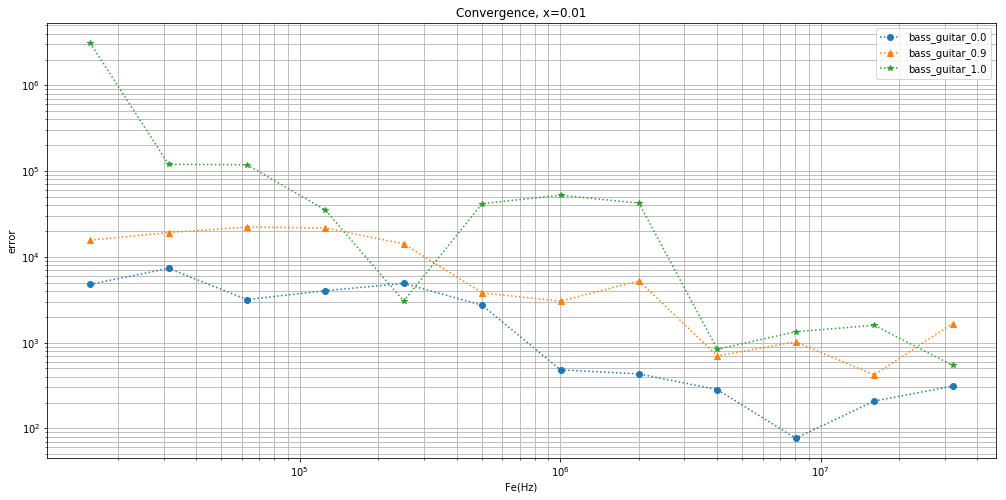

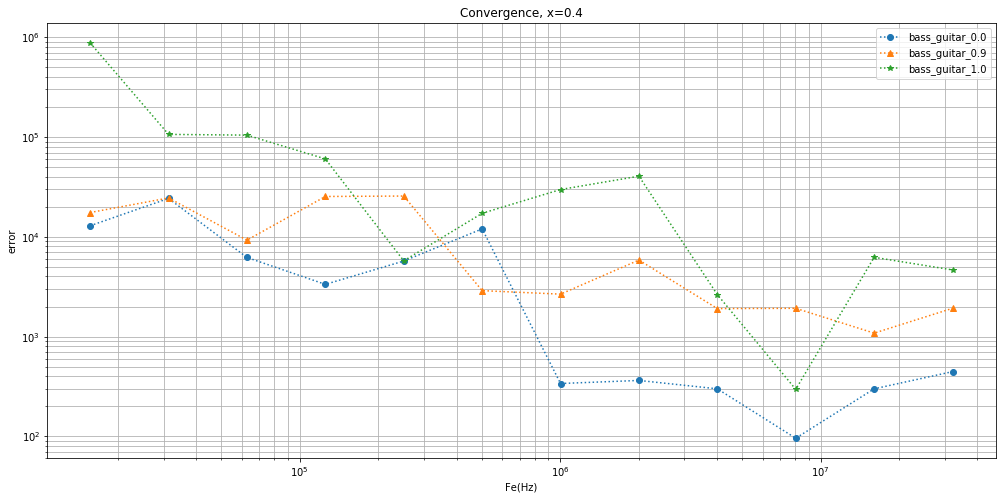

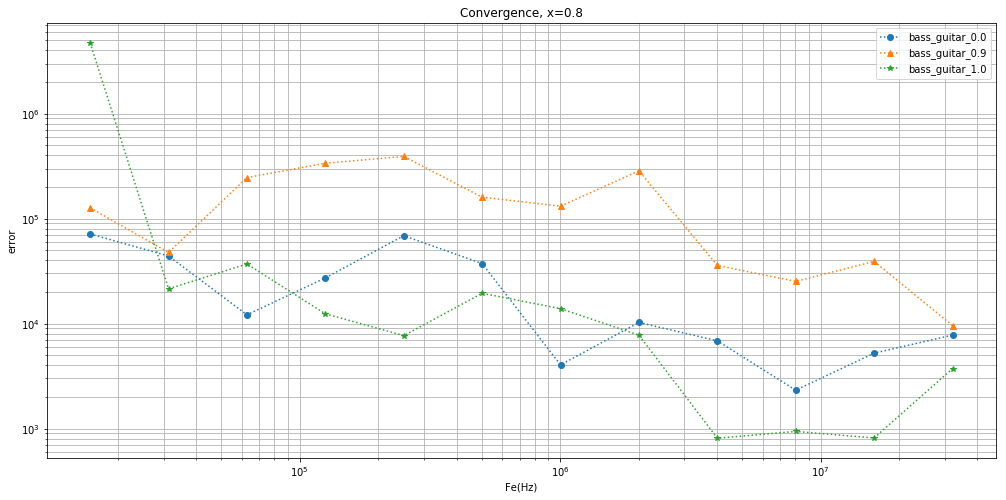

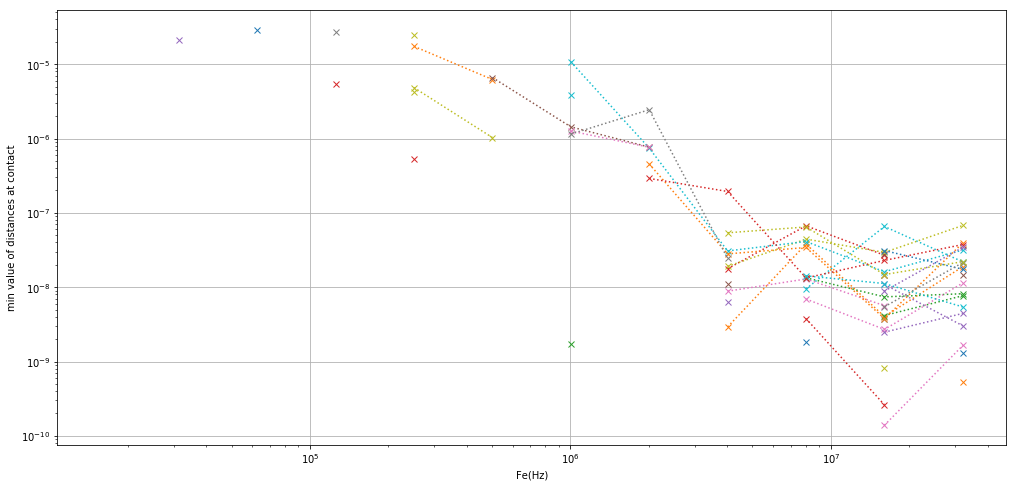

In [16]:
fig = plot_errors(errors, freqs, 0, 23)
fig.title("Convergence, x=0.01")
plt.savefig(os.path.join(figures_path, 'cvg_x=0.01.pdf'))
fig1 = plot_errors(errors, freqs, 1, 1)
fig1.title("Convergence, x=0.4")  
plt.savefig(os.path.join(figures_path, 'cvg_x=0.4.pdf'))
fig2 = plot_errors(errors, freqs, 2, 2)
fig2.title("Convergence, x=0.8")  
plt.savefig(os.path.join(figures_path, 'cvg_x=0.8.pdf'))
fig4 = plot_y(ymin, freqs, 4)
#fig4.title()
plt.savefig(os.path.join(figures_path, 'min_y.pdf'))

#### Save results (errors ...) in pkl file

In [ ]:
date = datetime.datetime.now().isoformat()
bckpfilename = os.path.join(figures_path, 'backup' + str(date) + '.pkl')
print('backup to file ' + bckpfilename + ' ...')
bckpfile = open(bckpfilename, 'wb')
backups = (errors, ymin, freqs)
pickle.dump(backups, bckpfile)


In [ ]:
# To load a file:
bckpfile = open('fig_campaign0212/backup2017-12-13T14:26:26.296423.pkl', 'rb')
#bckpfile = open('fig_campaign_new_0612/backup2017-12-14T11:16:22.928082.pkl', 'rb')

results = pickle.load(bckpfile)
err = results[0]
fre = results[2]
bckpfile.close()


for name in errors:
    err[name] = errors[name]
    fre[name] = freqs[name]

In [ ]:
fig = plot_errors(err, fre, 0, 23)
fig.title("Convergence, x=0.01")
plt.savefig(os.path.join(figures_path, 'comp_cvg_x=0.01.pdf'))
fig1 = plot_errors(err, fre, 1, 1)
fig1.title("Convergence, x=0.4")  
plt.savefig(os.path.join(figures_path, 'comp_cvg_x=0.4.pdf'))
fig2 = plot_errors(err, fre, 2, 2)
fig2.title("Convergence, x=0.8")  
plt.savefig(os.path.join(figures_path, 'comp_cvg_x=0.8.pdf'))
#fig4 = plot_y(ymin, freqs, 4)
#fig4.title()
#plt.savefig(os.path.join(figures_path, 'min_y.pdf'))

### plot simulations durations

In [ ]:
fig = plot_durations(timers)
plt.savefig(os.path.join(figures_path, 'Durations.pdf'))